In [1]:
import numpy as np
import pandas as pd 
import netCDF4
import os 
import sys
import matplotlib.pyplot as plt

import data_gen_funcs
from data_gen_funcs import scaler
#1 Append arrays to have full data
#2 Make a  mean out of latitude longitude/ values
import geopandas

# open kamoul



KeyboardInterrupt: 

In [ ]:
import boto3
from botocore.client import Config

access_key = 'aa0fd223062f4aba9c15b52943bfcab5'
secret_key = 'a95d76d27a8b4b908985c81b823a4b70'
endpoint = 'https://s3.sbg.io.cloud.ovh.net'  # Changez 'your-region' par votre région

s3_client = boto3.client('s3',
                         endpoint_url=endpoint,
                         aws_access_key_id=access_key,
                         aws_secret_access_key=secret_key,
                         config=Config(signature_version='s3'),
                         region_name='SBG')  # Changez 'your-region' par votre région

#%%
import pandas as pd
from io import StringIO

bucket_name = 'era5'  # Remplacez par le nom de votre bucket
file_name = 'era5-land-2022-11.nc' 
 # Remplacez par le nom de votre fichier

s3_client.download_file(bucket_name, file_name, file_name)

In [2]:
path= 'C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/Saturn-I stage/Datasets/Copernicus/ERA5/8_mesures_a_day/'
path_agreste='C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/Saturn-I stage/Datasets/Agreste/Production vin région bordeaux 2000-2022.csv'

In [3]:
from sklearn.preprocessing import MinMaxScaler
def scaler(array):
    scaler = MinMaxScaler()
    array=array.reshape(-1,1)
    scaler.fit(array)
    array=scaler.transform(array)
    return array


In [4]:
def data_year_check(arr):
    
    year=[]
    year.append(int(np.round((arr[0]+1900*24*365)/(24*365),1)))
    year.append(int(np.round((arr[-1]+1900*24*365)/(24*365),1)-1))
        
    return year

path5='C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/Saturn-I stage/Datasets/Copernicus/ERA5/8_mesures_a_day/2021-2022.nc'

f= netCDF4.Dataset(path5)
f.variables.keys()
time=np.asarray(f.variables["time"])
print(data_year_check(time))

[2021, 2022]


In [6]:
f.variables

{'longitude': <class 'netCDF4._netCDF4.Variable'>
 float32 longitude(longitude)
     units: degrees_east
     long_name: longitude
 unlimited dimensions: 
 current shape = (5,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'latitude': <class 'netCDF4._netCDF4.Variable'>
 float32 latitude(latitude)
     units: degrees_north
     long_name: latitude
 unlimited dimensions: 
 current shape = (9,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'time': <class 'netCDF4._netCDF4.Variable'>
 int32 time(time)
     units: hours since 1900-01-01 00:00:00.0
     long_name: time
     calendar: gregorian
 unlimited dimensions: 
 current shape = (5840,)
 filling on, default _FillValue of -2147483647 used,
 'u10': <class 'netCDF4._netCDF4.Variable'>
 int16 u10(time, latitude, longitude)
     scale_factor: 0.0005061161952309571
     add_offset: 1.5123278134844158
     _FillValue: -32767
     missing_value: -32767
     units: m s**-1
     long_name: 10 metre U wind comp

In [5]:


def data_append(path):
    
    a=1940
    b=1942
    f= netCDF4.Dataset(path+str(a)+'-'+str(b)+'.nc')
    f.variables.keys()

    t2m=np.mean(np.mean(np.asarray(f.variables["t2m"]),axis=1),axis=1)
    sp=np.mean(np.mean(np.asarray(f.variables["sp"]),axis=1),axis=1)
    tp=np.mean(np.mean(np.asarray(f.variables["tp"]),axis=1),axis=1)
    stl1=np.mean(np.mean(np.asarray(f.variables["stl1"]),axis=1),axis=1)
    mtpr=np.mean(np.mean(np.asarray(f.variables["mtpr"]),axis=1),axis=1)
    mper=np.mean(np.mean(np.asarray(f.variables["mper"]),axis=1),axis=1)
    evaporation=np.mean(np.mean(np.asarray(f.variables["e"]),axis=1),axis=1)
    v10=np.mean(np.mean(np.asarray(f.variables["v10"]),axis=1),axis=1)
    u10=np.mean(np.mean(np.asarray(f.variables["u10"]),axis=1),axis=1)
    i10fg=np.mean(np.mean(np.asarray(f.variables["i10fg"]),axis=1),axis=1)
    mvimd=np.mean(np.mean(np.asarray(f.variables["mvimd"]),axis=1),axis=1)
    pev=np.mean(np.mean(np.asarray(f.variables["pev"]),axis=1),axis=1)
    
    a+=3
    b+=3
    time= np.asarray(f.variables['time'])
    for i in range(27):
       
        if a == 2021:
            b-=1
            
        f= netCDF4.Dataset(path+str(a)+'-'+str(b)+'.nc')
        f.variables.keys()
        
        t2m = np.concatenate((t2m,np.mean(np.mean(np.asarray(f.variables["t2m"]),axis=1),axis=1)),axis=0)    
        sp= np.concatenate((sp,np.mean(np.mean(np.asarray(f.variables["sp"]),axis=1),axis=1)),axis=0)
        tp= np.concatenate((tp,np.mean(np.mean(np.asarray(f.variables["tp"]),axis=1),axis=1)),axis=0)
        stl1= np.concatenate((stl1,np.mean(np.mean(np.asarray(f.variables["stl1"]),axis=1),axis=1)),axis=0)
        mtpr= np.concatenate((mtpr,np.mean(np.mean(np.asarray(f.variables["mtpr"]),axis=1),axis=1)),axis=0)
        mper= np.concatenate((mper,np.mean(np.mean(np.asarray(f.variables["mper"]),axis=1),axis=1)),axis=0)
        evaporation= np.concatenate((evaporation,np.mean(np.mean(np.asarray(f.variables["e"]),axis=1),axis=1)),axis=0)   
        v10= np.concatenate((v10,np.mean(np.mean(np.asarray(f.variables["v10"]),axis=1),axis=1)),axis=0)      
        i10fg=np.concatenate((i10fg,np.mean(np.mean(np.asarray(f.variables["i10fg"]),axis=1),axis=1)),axis=0)   
        mvimd=np.concatenate((mvimd,np.mean(np.mean(np.asarray(f.variables["mvimd"]),axis=1),axis=1)),axis=0)   
        pev=np.concatenate((pev,np.mean(np.mean(np.asarray(f.variables["pev"]),axis=1),axis=1)),axis=0)   
        u10= np.concatenate((u10,np.mean(np.mean(np.asarray(f.variables["u10"]),axis=1),axis=1)),axis=0)      
        time=np.concatenate((time,np.asarray(f.variables["time"])),axis=0)
        
        a+=3
        b+=3
        
    return  t2m,sp,tp,stl1,mtpr,mper,evaporation,v10,i10fg,mvimd,pev,u10,time

In [6]:
path= 'C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/Saturn-I stage/Datasets/Copernicus/ERA5/8_mesures_a_day/'

t2m,sp,tp,stl1,mtpr,mper,evaporation,v10,i10fg,mvimd,pev,u10,time=data_append(path)


In [7]:
data_copernicus=np.zeros((len(t2m),13))


data_copernicus[:,0]=t2m
data_copernicus[:,1]=sp
data_copernicus[:,2]=tp
data_copernicus[:,3]=stl1
data_copernicus[:,4]=mtpr
data_copernicus[:,5]=mper
data_copernicus[:,6]=evaporation
data_copernicus[:,7]=v10
data_copernicus[:,8]=u10
data_copernicus[:,9]=i10fg
data_copernicus[:,10]=mvimd
data_copernicus[:,11]=pev
data_copernicus[:,12]=time

data_copernicus=pd.DataFrame(data_copernicus)

In [8]:
data_copernicus.columns=['2m temperature','Surface pressure','total precipitation',
                         'soil_temperature_level_1','mean total precipitation rate',
                         'mean potential evaporation rate',
                         'evaporation','10m v-component of wind','10m u-component of wind',
                         'Instantaneous 10m wind gust','Mean vertically integrated moisture divergence',
                         'Potential evaporation','Time (gregorian)']

In [9]:

data_copernicus.tail()

,2m temperature,Surface pressure,total precipitation,soil_temperature_level_1,mean total precipitation rate,mean potential evaporation rate,evaporation,10m v-component of wind,10m u-component of wind,Instantaneous 10m wind gust,Mean vertically integrated moisture divergence,Potential evaporation,Time (gregorian)
242523,287.301311,101135.170290,0.000000e+00,286.996811,4.336809e-19,-2.712147e-06,-0.000038,0.996472,1.843069,4.082717,0.000083,-0.000010,1078185.0
242524,289.526683,101118.528973,9.088249e-09,288.769334,5.049018e-09,-1.935830e-05,-0.000069,1.218496,1.267165,4.013884,0.000344,-0.000070,1078188.0
242525,289.613520,101013.370103,5.907362e-07,289.292964,1.565196e-07,-1.240197e-05,-0.000051,2.540804,-0.092353,4.451918,0.000428,-0.000045,1078191.0
242526,288.010250,101104.492536,6.361774e-08,288.058750,1.514705e-08,3.522755e-07,-0.000029,3.440653,0.801504,4.931764,0.000185,0.000001,1078194.0
242527,286.734283,101184.478223,1.817650e-08,287.025335,5.049018e-09,5.325933e-07,-0.000021,2.389596,1.274971,4.285876,0.000052,0.000002,1078197.0


In [10]:
#Avec des valeurs manquantes sur uniquement les 3 premières valeur du tableau sur certaines caractéristiques,
# il est plus simple de les supprimer

for i in range(3):
    
    data_copernicus=data_copernicus.drop([data_copernicus.index[0]])

In [11]:
print(len(data_copernicus['Time (gregorian)']))
print(len(np.unique(data_copernicus['Time (gregorian)'])))
print(data_copernicus['Time (gregorian)'])

242525
242525
3          350625.0
4          350628.0
5          350631.0
6          350634.0
7          350637.0
            ...    
242523    1078185.0
242524    1078188.0
242525    1078191.0
242526    1078194.0
242527    1078197.0
Name: Time (gregorian), Length: 242525, dtype: float64


In [12]:
#Données agreste 2000-2022

production= [7227.31,6913.59,5903.98,5794.61,7698.91,6481.59,6081.5,5932.02,4898.15,6069.09,5983.02,
             6187.886,5609.83,3964.662,5642.354,5672.266,6700.237,3638.261,5533.976,5296.319,5000.269,4127.938]

productionv2= [7227.31,6913.59,5903.98,5794.61,7698.91,6481.59,6081.5,5932.02,4898.15,6069.09,5983.02,
             6187.886,5609.83,3964.662,5642.354,5672.266,6700.237,3638.261,5533.976,5296.319,5000.269]
# production= [7227.31,6913.59,5903.98,5794.61,7698.91,6481.59,6081.5,5932.02,4898.15,6069.09,5983.02,
#              6187.886,5609.83,3964.662,5642.354,5672.266,6700.237,3638.261,5533.976,5296.319,5000.269,4127.938,4503.6]

years = np.arange(2000,2022,1)


## Fonctions pour la gestion du temps parmi les données

In [53]:
def mean_time_resolution(arr,resolution,start,finish,choice):
    
    day_resolution=8
    years_total=int(finish-start)
    months_total=years_total*12
    days_total=(months_total*30)
    
    init_idx=(365*day_resolution*int(start-1940))
    
    
    if resolution=='day':
        k=init_idx
        day_means=[]
        time=[]
        
        for day in range(days_total):
       
            day_actual=[]
                
            for j in range(day_resolution):

                #Valeurs manquantes pour le 1er jour du dataset
                day_actual.append(float(arr[k]))
                k+=1

            time.append(day)
            if choice=='mean':
                day_means.append(np.mean(day_actual))
            if choice=='max':
                day_means.append(max(day_actual))
            if choice=='min':
                day_means.append(min(day_actual))
            
        return day_means,time
    
    if resolution=='month':
        
        k=init_idx
        month_means=[]
        time=[]
        
        for month in range(months_total):
            
            month_actual=[]
            time.append(month)
            
            for day in range(30):
                
                            
                for hour in range(day_resolution):

                    k+=1

                    month_actual.append(float(arr[k]))
                    
            if choice=='mean':
                month_means.append(np.mean(month_actual))
            if choice=='max':
                month_means.append(max(month_actual))
            if choice=='min':
                month_means.append(min(month_actual))
        
        return month_means,time
        
        
    if resolution=='year':
        time=[]
        k=init_idx
        year_means=[]
        
        for year in range(years_total):
            year_actual=[]
            for j in range(365):
                for l in range(day_resolution):
                    k+=1
                    year_actual.append(float(arr[k]))
                    time.append(k)
                
            if choice=='mean':
                year_means.append(np.mean(year_actual))
            if choice=='max':
                year_means.append(max(year_actual))
            if choice=='min':
                year_means.append(min(year_actual))
            time.append(year)
        
        return year_means,time

In [54]:
from datetime import datetime
# data_copernicus=data_copernicus.reset_index(drop=True)

# def mean_time_resolution(arr,resolution,start,finish):
    
#     day_resolution=8
#     years_total=int(finish-start)
#     months_total=years_total*12
#     days_total=(months_total*31)
    
#     init_idx=(365*8*int(start-1940))
    
    
#     if resolution=='day':
#         k=init_idx
#         day_means=[]
#         time=[]
        
#         for day in range(days_total):
       
#             day_actual=[]
                
#             for j in range(day_resolution):

#                 #Valeurs manquantes pour le 1er jour du dataset
#                 day_actual.append(float(arr[k]))
#                 k+=1

#             time.append(day)    
#             day_means.append(np.mean(day_actual))
            
#         return day_means,time
    
#     if resolution=='month':
        
#         k=init_idx
#         month_means=[]
#         time=[]
        
#         for month in range(months_total):
            
#             month_actual=[]
#             time.append(month)
            
#             for day in range(30):
                
                            
#                 for hour in range(day_resolution):

#                     k+=1

#                     month_actual.append(float(arr[k]))
                    
#             month_means.append(np.mean(month_actual))
        
#         return month_means,time
        
        
#     if resolution=='year':
#         time=[]
#         k=init_idx
#         year_means=[]
        
#         for year in range(years_total):
#             year_actual=[]
#             for j in range(365):
#                 k+=1
#                 year_actual.append(float(arr[k]))
#                 time.append(k)
                
#             year_means.append(np.mean(year_actual))
#             time.append(year)
        
#         return year_means,time
    


def year_period_filter(month_start,month_finish):
    
    day_resolution=8


    date_format = "%d/%m/%Y"
    

    Start="01/"+'01'+'/'+'1940'
    Finish="31/"+'12'+'/'+'2022'
    a = datetime.strptime(Start, date_format)
    b = datetime.strptime(Finish, date_format)
    delta = b - a   
    delta_all_days=delta.days+1
    idx_all_years=[np.arange(0,(delta_all_days*8)-3,1)]
        
    for i in range(1,82):
        
        idx_year=np.arange(len(np.hstack(idx_all_years)),len(np.hstack(idx_all_years))+(365*8))
        idx_all_years.append(idx_year)
    
    init_idx=np.arange(0,364*day_resolution)
    year_slicings=[]
    year=1940

    for i in range(1,82):
        
        year+=1
        Start="01/"+'01'+'/'+'1940'
        Finish="31/"+'12'+'/'+str(year)
        a = datetime.strptime(Start, date_format)
        b = datetime.strptime(Finish, date_format)
        delta = b - a  

        days_post_years=delta.days+1
    
        first_day_year="01/"+'01/'+str(year)
        Start="01/"+str(month_start)+'/'+str(year)
        Finish="01/"+str(month_finish)+'/'+str(year)
        a = datetime.strptime(first_day_year, date_format)
        b = datetime.strptime(Start, date_format)
        delta = b - a
        start_idx= (delta.days +1)*8
        
        c = datetime.strptime(Start, date_format)
        d = datetime.strptime(Finish, date_format)
        Delta = d - c
        end_idx= (Delta.days +1)*8
        
        year_slicings.append(np.arange((days_post_years*day_resolution)+start_idx,(days_post_years*day_resolution)+start_idx+end_idx,1))
        
 
    
        
  
        
        
    
    return np.hstack(year_slicings),abs(int(start_idx-end_idx))

In [137]:
def data_formatting_year(data_copernicus,start,finish,scaling,data_nature,choice):
    
        years_tot=int(finish-start)
        nb_features=3

        if data_nature=='1D':






            temperature,time=mean_time_resolution(np.asarray(data_copernicus['2m temperature']),'year',start,finish,choice)
            Surface_pressure,time=mean_time_resolution(np.asarray(data_copernicus['Surface pressure']),'year',start,finish,choice)
            total_precipitation,time=mean_time_resolution(np.asarray(data_copernicus['total precipitation']),'year',start,finish,choice)
            soil_temperature_level_1,time=mean_time_resolution(np.asarray(data_copernicus['soil_temperature_level_1']),'year',start,finish,choice)
            mean_total_precipitation_rate,time=mean_time_resolution(np.asarray(data_copernicus['mean total precipitation rate']),'year',start,finish,choice)
            mean_potential_evaporation_rate,time=mean_time_resolution(np.asarray(data_copernicus['mean potential evaporation rate']),'year',start,finish,choice)
            evaporation,time=mean_time_resolution(np.asarray(data_copernicus['evaporation']),'year',start,finish,choice)
            v10,time=mean_time_resolution(np.asarray(data_copernicus['10m v-component of wind']),'year',start,finish,choice)
            u10,time=mean_time_resolution(np.asarray(data_copernicus['10m u-component of wind']),'year',start,finish,choice)
            i10fg,time=mean_time_resolution(np.asarray(data_copernicus['Instantaneous 10m wind gust']),'year',start,finish,choice)
            Mean_vertically_integrated_moisture_divergence,time=mean_time_resolution(np.asarray(data_copernicus['Mean vertically integrated moisture divergence']),'year',start,finish,choice)
            potential_evaporation,time=mean_time_resolution(np.asarray(data_copernicus['Potential evaporation']),'year',start,finish,choice)



        data_matrix=np.zeros((years_tot,nb_features)).T   
    #         data_matrix=np.zeros((years_tot,4)).T   

        for i in range(years_tot):

#             data_matrix[0][i]=temperature[i]
#             data_matrix[1][i]=Surface_pressure[i]
#             data_matrix[2][i]=total_precipitation[i]
#             data_matrix[3][i]=soil_temperature_level_1[i]
#             data_matrix[4][i]=mean_total_precipitation_rate[i]
#             data_matrix[5][i]=mean_potential_evaporation_rate[i]
#             data_matrix[6][i]=evaporation[i]
#             data_matrix[7][i]=v10[i]
#             data_matrix[8][i]=u10[i]
#             data_matrix[9][i]=i10fg[i]
#             data_matrix[10][i]=Mean_vertically_integrated_moisture_divergence[i]
#             data_matrix[11][i]=potential_evaporation[i]




            data_matrix[0][i]=temperature[i]
    #         data_matrix[1][i]=Surface_pressure[i]
#             data_matrix[1][i]=total_precipitation[i]
            data_matrix[1][i]=soil_temperature_level_1[i]
#             data_matrix[1][i]=mean_total_precipitation_rate[i]
    #         data_matrix[3][i]=mean_potential_evaporation_rate[i]
#             data_matrix[3][i]=evaporation[i]
    #         data_matrix[7][i]=v10[i]
#             data_matrix[4][i]=u10[i]
            data_matrix[2][i]=i10fg[i]
    #         data_matrix[10][i]=Mean_vertically_integrated_moisture_divergence[i]
    #         data_matrix[11][i]=potential_evaporation[i]   

    
    
        
        if scaling==True: 

#             data_matrix[0]=scaler(np.array(data_matrix[0])).flatten()
#             data_matrix[1]=scaler(np.array(data_matrix[1])).flatten()
#             data_matrix[2]=scaler(np.array(data_matrix[2])).flatten()
#             data_matrix[3]=scaler(np.array(data_matrix[3])).flatten()
#             data_matrix[4]=scaler(np.array(data_matrix[4])).flatten()
#             data_matrix[5]=scaler(np.array(data_matrix[5])).flatten()
#             data_matrix[6]=scaler(np.array(data_matrix[6])).flatten()
#             data_matrix[7]=scaler(np.array(data_matrix[7])).flatten()
#             data_matrix[8]=scaler(np.array(data_matrix[8])).flatten()
#             data_matrix[9]=scaler(np.array(data_matrix[9])).flatten()
#             data_matrix[10]=scaler(np.array(data_matrix[10])).flatten()
#             data_matrix[11]=scaler(np.array(data_matrix[11])).flatten()

        
            data_matrix[0]=scaler(np.array(data_matrix[0])).flatten()
            data_matrix[1]=scaler(np.array(data_matrix[1])).flatten()
            data_matrix[2]=scaler(np.array(data_matrix[2])).flatten()
#             data_matrix[3]=scaler(np.array(data_matrix[3])).flatten()
#             data_matrix[4]=scaler(np.array(data_matrix[4])).flatten()
#             data_matrix[5]=scaler(np.array(data_matrix[5])).flatten()
# #             data_matrix[6]=scaler(np.array(data_matrix[6])).flatten()
# #             data_matrix[7]=scaler(np.array(data_matrix[7])).flatten()
# #             data_matrix[8]=scaler(np.array(data_matrix[8])).flatten()
# #             data_matrix[9]=scaler(np.array(data_matrix[9])).flatten()
# #             data_matrix[10]=scaler(np.array(data_matrix[10])).flatten()
# #             data_matrix[11]=scaler(np.array(data_matrix[11])).flatten()


        return data_matrix.T
    
        if data_nature=='2D':
        
            start=2000
            finish=start+1
        
            for i in range(22):



                temperature,time=mean_time_resolution(np.asarray(data_copernicus['2m temperature']),'day',start,finish)
                Surface_pressure,time=mean_time_resolution(np.asarray(data_copernicus['Surface pressure']),'day',start,finish)
                total_precipitation,time=mean_time_resolution(np.asarray(data_copernicus['total precipitation']),'day',start,finish)
                soil_temperature_level_1,time=mean_time_resolution(np.asarray(data_copernicus['soil_temperature_level_1']),'day',start,finish)
                mean_total_precipitation_rate,time=mean_time_resolution(np.asarray(data_copernicus['mean total precipitation rate']),'day',start,finish)
                mean_potential_evaporation_rate,time=mean_time_resolution(np.asarray(data_copernicus['mean potential evaporation rate']),'day',start,finish)
                evaporation,time=mean_time_resolution(np.asarray(data_copernicus['evaporation']),'day',start,finish)
                v10,time=mean_time_resolution(np.asarray(data_copernicus['10m v-component of wind']),'day',start,finish)
                u10,time=mean_time_resolution(np.asarray(data_copernicus['10m u-component of wind']),'day',start,finish)
                i10fg,time=mean_time_resolution(np.asarray(data_copernicus['Instantaneous 10m wind gust']),'day',start,finish)
                Mean_vertically_integrated_moisture_divergence,time=mean_time_resolution(np.asarray(data_copernicus['Mean vertically integrated moisture divergence']),'day',start,finish)
                potential_evaporation,time=mean_time_resolution(np.asarray(data_copernicus['Potential evaporation']),'year',start,finish)


                data_matrix[0][i]=temperature[i]
        #         data_matrix[1][i]=Surface_pressure[i]
        #         data_matrix[1][i]=total_precipitation[i]
                data_matrix[3][i]=soil_temperature_level_1[i]
                data_matrix[1][i]=mean_total_precipitation_rate[i]
        #         data_matrix[3][i]=mean_potential_evaporation_rate[i]
                data_matrix[2][i]=evaporation[i]
        #         data_matrix[7][i]=v10[i]
        #         data_matrix[8][i]=u10[i]
                data_matrix[3][i]=i10fg[i]
        #         data_matrix[10][i]=Mean_vertically_integrated_moisture_divergence[i]
        #         data_matrix[11][i]=potential_evaporation[i]   




            if scaling==True: 

                data_matrix[i][0]=scaler(np.array(data_matrix[0])).flatten()
                data_matrix[1]=scaler(np.array(data_matrix[1])).flatten()
                data_matrix[2]=scaler(np.array(data_matrix[2])).flatten()
                data_matrix[3]=scaler(np.array(data_matrix[3])).flatten()
                data_matrix[4]=scaler(np.array(data_matrix[4])).flatten()
                data_matrix[5]=scaler(np.array(data_matrix[5])).flatten()
                data_matrix[6]=scaler(np.array(data_matrix[6])).flatten()
                data_matrix[7]=scaler(np.array(data_matrix[7])).flatten()
                data_matrix[8]=scaler(np.array(data_matrix[8])).flatten()
                data_matrix[9]=scaler(np.array(data_matrix[9])).flatten()
                data_matrix[10]=scaler(np.array(data_matrix[10])).flatten()
                data_matrix[11]=scaler(np.array(data_matrix[11])).flatten()

            length=len(mean_time_resolution(np.asarray(data_copernicus['2m temperature']),'day',start,finish))

            data_matrix= np.zeros((years_tot,12,len(data_copernicus['2m temperature'])))

            return data_matrix

        

In [138]:
data=data_formatting_year(data_copernicus,2000,2022,True,'1D','mean')

In [139]:
#>6500 = 4
#6500>x>6000=3
#6000>x>5250=2
#5250>x>4500=1
#4500>x=0

production3=[4,4,2,2,4,3,3,2,1,3,2,3,2,0,2,2,4,0,2,2,1,0]
len(production3)

#>6000 = 2
#6000>x>5000=1
#5000>x=0

production4=[2,2,1,1,2,2,2,1,0,2,1,2,1,0,1,1,2,0,1,1,1,0]
len(production4)

production5=[1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,0,0]
len(production5)


production= [7227.31,6913.59,5903.98,5794.61,7698.91,6481.59,6081.5,5932.02,4898.15,6069.09,5983.02,
             6187.886,5609.83,3964.662,5642.354,5672.266,6700.237,3638.261,5533.976,5296.319,5000.269,4127.938]


productionv2= [7227.31,6913.59,5903.98,5794.61,7698.91,6481.59,6081.5,5932.02,4898.15,6069.09,5983.02,
             6187.886,5609.83,3964.662,5642.354,5672.266,6700.237,3638.261,5533.976,5296.319,5000.269]





#70,72,74,76,80,82,84,86,88,90,92,94,96,88

# production= [,,,,,,,,,,,,,7227.31,6913.59,5903.98,5794.61,7698.91,6481.59,6081.5,5932.02,4898.15,6069.09,5983.02,
  
#              6187.886,5609.83,3964.662,5642.354,5672.266,6700.237,3638.261,5533.976,5296.319,5000.269,4127.938]

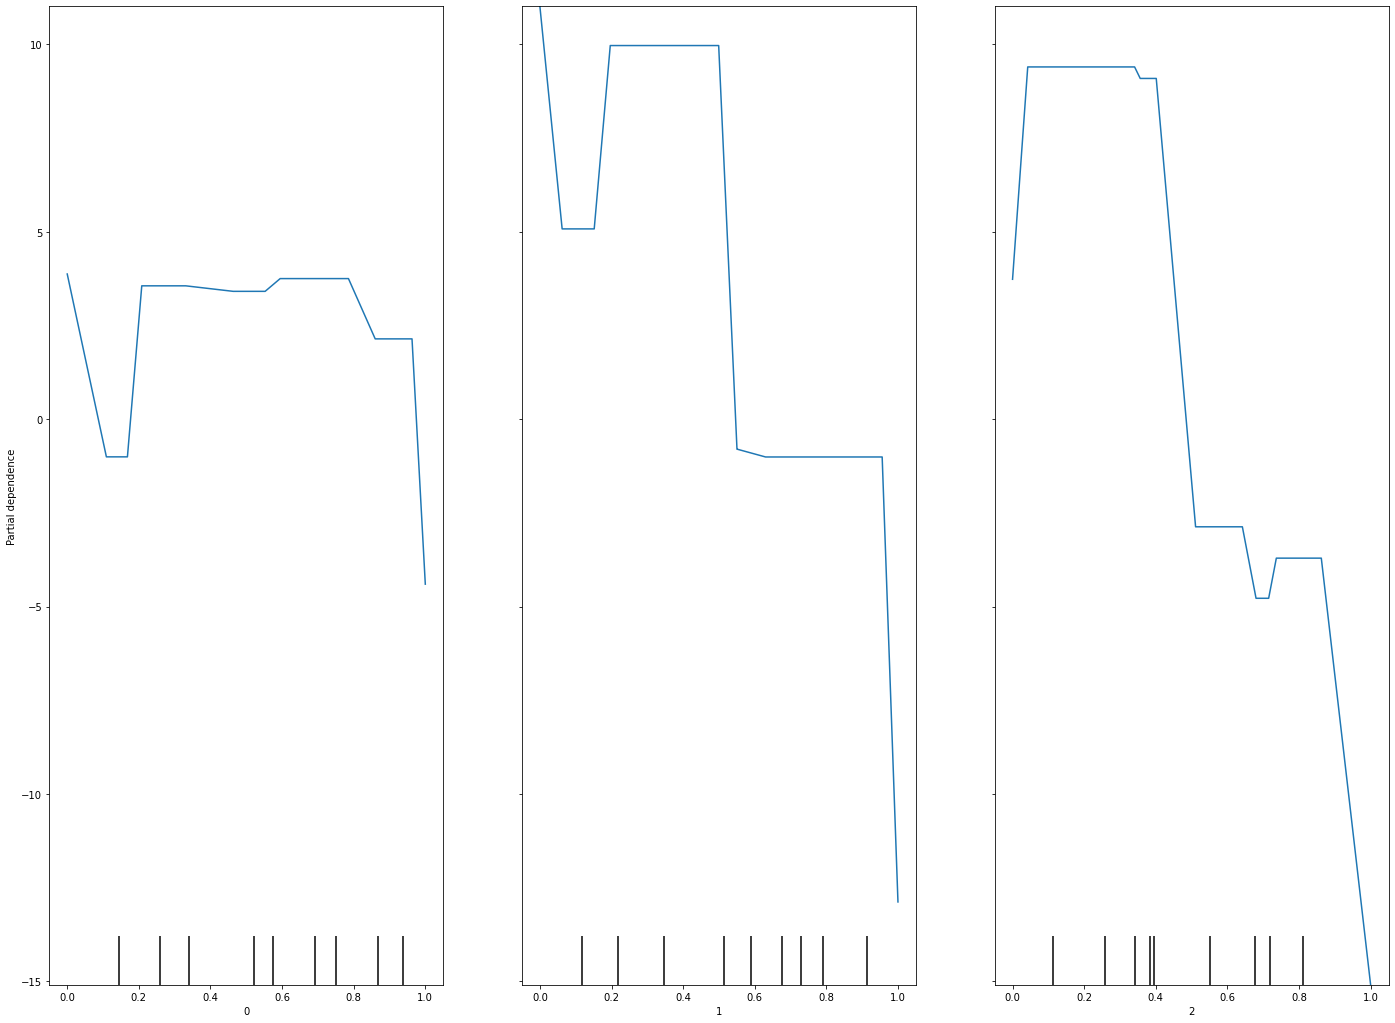

In [144]:
import sklearn

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(24, 18))

clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=1, random_state=np.random.randint(100)).fit(data, production5)
features = [0,1,2]
# features = [0,1,2,3,4,5,6,7,8,9,10,11]
PartialDependenceDisplay.from_estimator(clf, data,features,target=1,ax=ax)


In [148]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
f1=[]


for i in range(30):
    
    x_train, x_test, y_train, y_test = train_test_split(data,production5, test_size=0.2, random_state=np.random.randint(100))

    clf.fit(x_train, y_train)

    #Prédiction sur les données de test avec le modèle entraîné 

    prediction= clf.predict(x_test)

    #Evaluation de la précision de classification du modèle
    f1.append(f1_score(y_test,prediction))
print(np.mean(f1))

0.5747619047619047


In [149]:
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.tree import export_graphviz
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


f1=[]


for i in range(30):
    
    x_train, x_test, y_train, y_test = train_test_split(data,production5, test_size=0.2, random_state=np.random.randint(100))


    #Initialisation du modèle
    forest = RandomForestClassifier(n_estimators=500,
                                   random_state=42)

    #Entraînement du modèle
    forest.fit(x_train, y_train)

    #Prédiction sur les données de test avec le modèle entraîné 
    prediction= forest.predict(x_test)


    f1.append(f1_score(y_test,prediction))
print(np.mean(f1))

0.6324074074074074


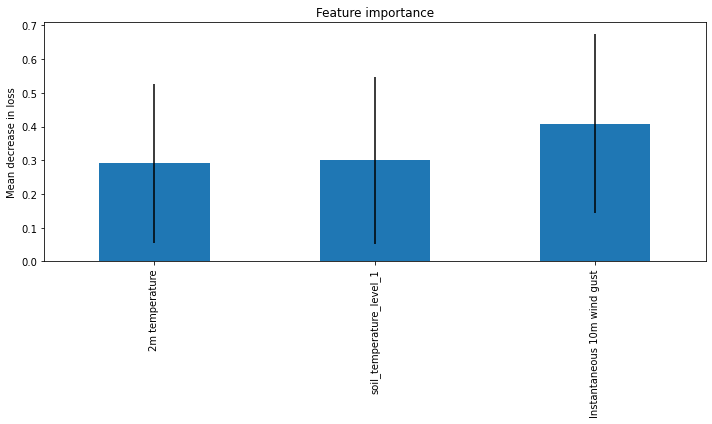

In [150]:
# feature_names=['2m temperature','Surface pressure','total precipitation',
#                          'soil_temperature_level_1','mean total precipitation rate',
#                          'mean potential evaporation rate',
#                          'evaporation','10m v-component of wind','10m u-component of wind',
#                          'Instantaneous 10m wind gust','Mean vertically integrated moisture divergence',
#                          'Potential evaporation']

feature_names=['2m temperature',
                         'soil_temperature_level_1',
                         'Instantaneous 10m wind gust']

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(10,6))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importance")
ax.set_ylabel("Mean decrease in loss")
fig.tight_layout()

## 2D data section

In [35]:
def year_choice(picked_period_indices,data,data_occurences_in_new_period,nb_features,year_start,year_end,scaling):
   
    years_tot=int(year_end-year_start)
    idx_year_init=year_start-1940
    
    a=idx_year_init
    
    features=data.columns
    
    data_matrix=np.zeros((data_occurences_in_new_period,nb_features,years_tot)).T
    print(data_matrix.shape)
    
    
    for i in range(years_tot):
        
        a+=1
        
        idx= picked_period_indices[a]
        
        for j in range(len(features)-1):
            
            l=features[j]
            
            if scaling==True:
                
                data_matrix[i][j]=scaler(np.asarray(data[l][idx]))
                
            if scaling==False:
                
                data_matrix[i][j]=np.asarray(data[l][idx])
        
    return data_matrix
        
        
        

In [36]:
picked_period_indices,data_occurences_in_new_period= year_period_filter(1,11)

In [37]:
data_matrix=year_choice(picked_period_indices,data_copernicus,data_occurences_in_new_period,12,2000,2021,False)



(21, 12, 2432)


In [38]:
data_matrix_day=np.zeros((21,12,int(data_occurences_in_new_period/8)))
years_tot=22
day_resolution=8
nb_features=12

for i in range(years_tot-1):
    for j in range(nb_features-1):
        
        kk=0
        day_means=[]
        
        for k in range(int(data_occurences_in_new_period/8)-1):
            
            
            
            day_actual=[]
            for l in range(day_resolution):
                kk+=1
                
                day_actual.append(data_matrix[i][j][kk])
                
            day_means.append(np.mean(day_actual))
            
    

        data_matrix_day[i][j]=day_means[j]

In [41]:
print(data_matrix_day.shape)

(21, 12, 304)


In [42]:
data_matrix2=year_choice(picked_period_indices,data_copernicus,data_occurences_in_new_period,12,2021,2022,False)
data_matrix_day2=np.zeros((1,12,int(data_occurences_in_new_period/8)))
years_tot=22
day_resolution=8


for j in range(nb_features-1):

    kk=0
    day_means=[]

    for k in range(int(data_occurences_in_new_period/8)-1):



        day_actual=[]
        for l in range(day_resolution):
            
            kk+=1

            day_actual.append(data_matrix2[0][j][kk])

        day_means.append(np.mean(day_actual))



    data_matrix_day2[0][j]=day_means[j]

(1, 12, 2432)


In [43]:
print(data_matrix_day2.shape)


(1, 12, 304)


In [44]:
#Création des classes de production (labels):



val_olympique=np.mean([5672.266,6700.237,5533.976,5296.319,5000.269])

production6 = []
production7=[]
production8=[]
for i in range(len(productionv2)):
    
    if production[i]>val_olympique:
        
        production6.append(int(1))
        
    else : 
        production6.append(int(0))   
    
    if production[i]>val_olympique*0.8:
        production8.append(int(1))
        
    else : 
        production8.append(int(0))
        
    
    if production[i]>val_olympique*0.7:
        
        production7.append(int(1))
        
    else : 
        production7.append(int(0))
        

print(val_olympique)
print(val_olympique*0.8)



5640.6134
4512.490720000001


In [78]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from datetime import datetime
import keras
from keras.layers import Conv1D, Dense, Dropout, Input, Concatenate, GlobalMaxPooling1D, BatchNormalization
from keras.layers.convolutional import MaxPooling1D
import tensorflow.keras
import tensorflow as tf

from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Flatten,LSTM
from keras.utils import to_categorical
from keras.layers import Dense, Activation, Concatenate
from sklearn.metrics import f1_score


lg=int(data_occurences_in_new_period/8)
# data_matrix=data_matrix.reshape((21,data_occurences_in_new_period,nb_features))
# lg=int(data_occurences_in_new_period/8)
data_matrix_day=data_matrix_day.reshape((21,lg,nb_features))

# data_occurences_in_new_period

drop_out_rate=0.1
outlayer_neurons=128

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15,restore_best_weights=True)


#Construction et définition du réseau de neurones 
model = Sequential([

  layers.Conv1D(256, 6, padding='same', activation='relu', input_shape=(lg,nb_features)),
  layers.MaxPooling1D(pool_size=12),
  layers.Dropout(drop_out_rate),
  layers.Conv1D(128, 4, padding='same', activation='relu'),
  layers.MaxPooling1D(pool_size=6),
  layers.Dropout(drop_out_rate),
  layers.Conv1D(64, 2, padding='same', activation='relu'),
  layers.MaxPooling1D(),
  layers.Dropout(drop_out_rate),
  layers.Flatten(),
  layers.Dense(outlayer_neurons, activation='relu'),
  layers.Dense(2,activation='softmax')
    ])


# model = Sequential([

#   layers.Conv1D(256, 4, padding='same', activation='relu', input_shape=(lg,nb_features)),
#   layers.MaxPooling1D(pool_size=16),
#   layers.Dropout(drop_out_rate),
#   layers.Conv1D(128, 2, padding='same', activation='relu'),
#   layers.MaxPooling1D(pool_size=8),
#   layers.Dropout(drop_out_rate),
#   layers.Conv1D(64, 2, padding='same', activation='relu'),
#   layers.MaxPooling1D(),
#   layers.Dropout(drop_out_rate),
#   layers.Flatten(),
#   layers.Dense(outlayer_neurons, activation='relu'),
#   layers.Dense(2,activation='sigmoid')
#     ])

#On choisit ici un learning rate plus petit pour notre optimiseur (valeur par défaut à 0.01)
optimizer = keras.optimizers.Adam(lr=0.001)

f1=[]
prob_class=[]


    
#Compilation du modèle
model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'] )
    
for j in range(50):


    #Séparation des données test et entraînement
    x_train, x_test, y_train, y_test = train_test_split(data_matrix_day, production7, test_size=0.01, random_state=np.random.randint(500))
    y_train = to_categorical(y_train)


    history=model.fit(x_train, y_train,
                        epochs=500,
                        batch_size=2,verbose=0)


    prob_class.append(model.predict(data_matrix_day2.reshape((1,lg,12))))
    
    pred_labels=[]

    for i in range(len(x_test)):

        pred_labels.append(np.argmax(prob_class[i]))

#     f1.append(f1_score(pred_labels,y_test))
    

1/1 [==============================] - 0s 19ms/step


In [79]:
##### 50 experiments mean - 100 epochs:
score_SUP=[]
score_INF=[]
for i in range(len(production8)):
    
    score_SUP.append(prob_class[i][0][1])
    score_INF.append(prob_class[i][0][0])
    
# 100% valeur olympique:

# Ecart-type des scores pour la classe Sup :   0.07250548
# Moyenne des scores pour la classe Sup :   0.5343648
# Ecart-type des scores pour la classe Inf :   0.0725055
# Moyenne des scores pour la classe Inf :   0.46563515

    
#80% valeur olympique:

# Ecart-type des scores pour la classe Sup :   0.0065212045
# Moyenne des scores pour la classe Sup :   0.99660385
# Ecart-type des scores pour la classe Inf :   0.006521213
# Moyenne des scores pour la classe Inf :   0.003396277

    
#70% valeur olympique:

# Ecart-type des scores pour la classe Sup :   0.012586036
# Moyenne des scores pour la classe Sup :   0.97726476
# Ecart-type des scores pour la classe Inf :   0.01258604
# Moyenne des scores pour la classe Inf :   0.022735272


print('Ecart-type des scores pour la classe Sup :  ',np.std(score_SUP))
print('Moyenne des scores pour la classe Sup :  ',np.mean(score_SUP))
print('Ecart-type des scores pour la classe Inf :  ',np.std(score_INF))
print('Moyenne des scores pour la classe Inf :  ',np.mean(score_INF))

Ecart-type des scores pour la classe Sup :   0.008138976
Moyenne des scores pour la classe Sup :   0.9839379
Ecart-type des scores pour la classe Inf :   0.008138984
Moyenne des scores pour la classe Inf :   0.016062062


In [62]:
##### 50 experiments mean - 200 epochs:
score_SUP=[]
score_INF=[]

for i in range(len(production8)):
    
    score_SUP.append(prob_class[i][0][1])
    score_INF.append(prob_class[i][0][0])
    
# 100% valeur olympique:


# Moyenne des scores pour la classe Sup :   0.55533713
# Ecart-type des scores pour la classe Sup :   0.06441035
# Moyenne des scores pour la classe Inf :   0.4446628
# Ecart-type des scores pour la classe Inf :   0.06441035

    
#80% valeur olympique:


# Moyenne des scores pour la classe Sup :   0.994864
# Ecart-type des scores pour la classe Sup :   0.0024581614
# Moyenne des scores pour la classe Inf :   0.005135954
# Ecart-type des scores pour la classe Inf :   0.0024581563

    
#70% valeur olympique:


# Moyenne des scores pour la classe Sup :   0.9825795
# Ecart-type des scores pour la classe Sup :   0.008615628
# Moyenne des scores pour la classe Inf :   0.017420398
# Ecart-type des scores pour la classe Inf :   0.008615626


print('Ecart-type des scores pour la classe Sup :  ',np.std(score_SUP))
print('Moyenne des scores pour la classe Sup :  ',np.mean(score_SUP))
print('Ecart-type des scores pour la classe Inf :  ',np.std(score_INF))
print('Moyenne des scores pour la classe Inf :  ',np.mean(score_INF))

Ecart-type des scores pour la classe Sup :   0.0024581614
Moyenne des scores pour la classe Sup :   0.994864
Ecart-type des scores pour la classe Inf :   0.0024581563
Moyenne des scores pour la classe Inf :   0.005135954


In [74]:
f1=[]

for j in range(20):
    
    #Compilation du modèle
    model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'] )

    #Séparation des données test et entraînement
    x_train, x_test, y_train, y_test = train_test_split(data_matrix_day, production6, test_size=0.25, random_state=np.random.randint(500))
    y_train = to_categorical(y_train)


    history=model.fit(x_train, y_train,
                        epochs=500,
                        batch_size=2,verbose=0)


    prob_class = model.predict(x_test)
    pred_labels=[]

    for i in range(len(x_test)):

        pred_labels.append(np.argmax(prob_class[i]))


    f1.append(f1_score(pred_labels,y_test))
    
print(np.mean(f1))

1/1 [==============================] - 0s 109ms/step
0.7834848484848485


In [ ]:
Mean score of classification for 50 experiments:
    
#     Year_period= Janvier-Octobre (1-11):
    

    # prec outlayer_neurons = 128 - scaling = False - score =0.66
    # prec outlayer_neurons = 256 - scaling = False - score = 0.708
    # prec outlayer_neurons = 256 - scaling = True - score = 0.7029
    # prec outlayer_neurons = 128- scaling = True - score = 0.7211

#     Year_period= Janvier-Juillet (1-7):



    # prec outlayer_neurons = 128 - scaling = False? - score =0.7436
    # prec outlayer_neurons = 256 - scaling = False? - score = 0.72
    # prec outlayer_neurons = 256 - scaling = True - score = 0.
    # prec outlayer_neurons = 128- scaling = True - score = 0.

    
    

In [ ]:
model = Sequential([

  layers.Conv1D(256, 6, padding='same', activation='relu', input_shape=(lg,nb_features)),
  layers.MaxPooling1D(pool_size=12),
  layers.Dropout(drop_out_rate),
  layers.Conv1D(128, 4, padding='same', activation='relu'),
  layers.MaxPooling1D(pool_size=6),
  layers.Dropout(drop_out_rate),
  layers.Conv1D(64, 2, padding='same', activation='relu'),
  layers.MaxPooling1D(),
  layers.Dropout(drop_out_rate),
  layers.Flatten(),
  layers.Dense(outlayer_neurons, activation='relu'),
  layers.Dense(2,activation='sigmoid')
    ])